In [1]:
from PIL import Image
import numpy as np

import os
import pandas as pd
import os
from os import path
from pathlib import Path


In [2]:
!gdown --id 1CoU5WYRi_mPrNxdf1thi6yCc7f7pdJ2b

Downloading...
From: https://drive.google.com/uc?id=1CoU5WYRi_mPrNxdf1thi6yCc7f7pdJ2b
To: /content/Data_Training.csv
100% 106M/106M [00:01<00:00, 94.8MB/s]


In [3]:
data= pd.read_csv("Data_Training.csv")
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,label,sha256,fold,className
0,0.348073,0.003285,0.003107,0.003113,0.003103,0.003759,0.003080,0.004080,0.002428,0.002403,0.002489,0.002424,0.002409,0.002706,0.002479,0.002516,0.002381,0.002383,0.002528,0.002293,0.002419,0.002379,0.002436,0.002282,0.002340,0.002358,0.002387,0.002164,0.002325,0.002585,0.002327,0.002241,0.002648,0.002268,0.002329,0.002307,0.002499,0.004591,0.002276,0.002391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24268.0,450560.0,18444.0,491520.0,0.0,0.0,0.0,0.0,13197.0,475136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,00cc8b8f1cbc94dd182b7f0ae9bbb6e497ecab2f194fe2...,18,Adware
1,0.057452,0.005465,0.004782,0.007416,0.005413,0.004179,0.004543,0.006293,0.005420,0.003434,0.003547,0.003500,0.004678,0.003781,0.003370,0.005387,0.004477,0.003119,0.002954,0.005742,0.003623,0.003443,0.003814,0.002781,0.003739,0.003564,0.003133,0.003190,0.003628,0.003067,0.003377,0.003233,0.005288,0.002937,0.002909,0.003131,0.003772,0.003207,0.003039,0.003197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,406440.0,488.0,442368.0,0.0,0.0,7640.0,415232.0,4760.0,446464.0,56.0,381328.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,403824.0,0.0,0.0,324.0,380928.0,0.0,0.0,0.0,0.0,1,0379d99929825e6ae55795353dbbbe462f9b85b7e11528...,52,Adware
2,0.036781,0.006217,0.003983,0.004060,0.004049,0.003727,0.003650,0.003758,0.004344,0.003544,0.003683,0.003720,0.003881,0.003531,0.003595,0.004300,0.003952,0.004346,0.003566,0.003473,0.003806,0.004284,0.003711,0.003595,0.003687,0.003667,0.003290,0.003528,0.003685,0.003489,0.003634,0.003432,0.004053,0.003370,0.003648,0.003681,0.003927,0.003714,0.003500,0.003412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,29604.0,31738.0,2789376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,652.0,28672.0,0.0,0.0,0.0,0.0,1,03cfdb9c839f2d82e23e669f0c4cabccb30dcfdc573188...,37,Adware
3,0.178206,0.009927,0.005873,0.004264,0.011446,0.005299,0.003804,0.003588,0.010587,0.001691,0.001666,0.001842,0.006790,0.002757,0.001304,0.012998,0.008939,0.002329,0.001254,0.001275,0.004175,0.002809,0.001416,0.000936,0.002891,0.001373,0.001095,0.001257,0.002290,0.000849,0.000858,0.002395,0.004113,0.000888,0.001350,0.001459,0.007321,0.001145,0.000781,0.000870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,416936.0,480.0,442368.0,0.0,0.0,0.0,0.0,15048.0,446464.0,28.0,392464.0,0.0,0.0,0.0,0.0,24.0,392588.0,64.0,392496.0,0.0,0.0,380.0,331776.0,0.0,0.0,0.0,0.0,1,04b1ad9f01eaffe12c6e421a7d238b90959202b39cc03c...,16,Adware
4,0.169617,0.003844,0.003602,0.004057,0.004012,0.003139,0.003800,0.003855,0.003402,0.003121,0.002976,0.002987,0.002855,0.002805,0.002835,0.003493,0.002908,0.002900,0.002733,0.002794,0.002791,0.002824,0.002757,0.002776,0.002967,0.002806,0.002740,0.006816,0.002752,0.002795,0.002896,0.002965,0.004469,0.003413,0.002852,0.002721,0.002768,0.003152,0.003366,0.003017,...,0.0,1.0,0.0,-2.0,-1.0,1.0,0.0,0.0,15594.0,7692288.0,16876.0,7741440.0,0.0,0.0,5056.0,3836568.0,244.0,7667712.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,7553400.0,0.0,0.0,0.0,0.0,676.0,6594560.0,0.0,0.0,0.0,0.0,1,05f4c2f8506d14eba67d48a73f836d43672bd9c8fe6a0f...,22,Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12969,0.195938,0.011750,0.033319,0.006908,0.011229,0.007702,0.005268,0.004840,0.007760,0.009454,0.004912,0.003020,0.004633,0.004164,0.004099,0.002949,0.003067,0.001435,0.001529,0.002418,0.002749,0.002161,0.001349,0.001326,0.001380,0.001224,0.002207,0.002257,0.002077,0.001512,0.002920,0.001591,0.001998,0.001924,0.001874,0.001

In [4]:
conditions = [
    (data['className'] == 'Adware'),
    (data['className'] == 'Agent'),    
    (data['className'] == 'Backdoor'),
    (data['className'] == 'Downloader'),
    (data['className'] == 'Dropper'),
    (data['className'] == 'Ransomware'),
    (data['className'] == 'Spyware'),
    (data['className'] == 'Trojan'),
    (data['className'] == 'Virus'),
    (data['className'] == 'Worms')
    ]
values = [0,1,2,3,4,5,6,7,8,9]


In [5]:
data.groupby('className').size()

className
Adware        1414
Agent         2040
Backdoor      2006
Downloader     441
Dropper        140
Ransomware      81
Spyware         45
Trojan        2959
Virus         2596
Worms         1252
dtype: int64

In [ ]:
conditions

In [6]:
data['id_llable'] = np.select(conditions, values)


In [45]:
data.iloc[:,256:512].shape 

(12974, 256)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:797], data['id_llable'], test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:256], data['id_llable'], test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,256:512], data['id_llable'], test_size=0.2, random_state=42)

In [76]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,512:797], data['id_llable'], test_size=0.2, random_state=42)

In [77]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [78]:
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import pickle as pkl

In [79]:
save_dir = 'rere'

In [80]:
y_train = to_categorical(y_train, num_classes=11)
# y_test =to_categorical(y_test, num_classes=11)

In [55]:
y_test

5852     2
6339     2
304      0
11947    1
4442     8
        ..
9772     7
3857     8
3312     8
79       0
7529     2
Name: id_llable, Length: 2595, dtype: int64

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
if not os.path.exists('rere'):
    os.mkdir('rere')
with open(os.path.join('rere', 'scaler.pkl'), 'wb') as f:
    pkl.dump(scaler, f)

In [ ]:
len(X_train)

10379

In [82]:
X_train = np.expand_dims(X_train, axis=-1)

X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
len(X_test)

2595

In [ ]:
X_test

In [83]:
from tensorflow.python.keras import regularizers
dim = X_train.shape[1]
regularizer = regularizers.l2(5e-4)


In [84]:
import numpy as np
import pandas as pd
import os
import gc
import warnings;
root = "./images_dir_gray_6460128"
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Conv2D, Flatten, MaxPool1D, MaxPooling2D
from keras import layers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, Activation
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
# from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score


In [85]:
# Build the model
model = Sequential()
model.add(Conv1D(128, 64, strides=64, activation='relu',
    kernel_regularizer=regularizer, input_shape=(dim, 1)))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, strides=2, kernel_regularizer=regularizer,activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, kernel_regularizer=regularizer, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=regularizer, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(11, kernel_regularizer=regularizer, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 4, 128)            8320      
                                                                 
 batch_normalization_12 (Bat  (None, 4, 128)           512       
 chNormalization)                                                
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 128)            49280     
                                                                 
 batch_normalization_13 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)              

In [86]:
batch_size = 32 
epochs = 10 
learning_rate = 1e-3
weight_decay = 5e-4


In [87]:
from tensorflow.keras.optimizers import Adam

In [88]:
optimizer = Adam(learning_rate)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [89]:
print('Batch size: {}'.format(batch_size))
print('Epochs: {}'.format(epochs))
print('Learning rate: {}'.format(learning_rate))
print('Weight decay: {}'.format(weight_decay))


Batch size: 32
Epochs: 10
Learning rate: 0.001
Weight decay: 0.0005


In [90]:
model_name = 'malnet_model.{epoch:03d}.h5'


In [91]:

import os
from matplotlib import pyplot as plt


def visualize_result(history, save_dir=None):
    """Visualize accuracy and loss."""
    data = history.history
    plt.subplot(121)
    plt.plot(data['acc'], label='accuracy')
    plt.plot(data['val_acc'], label='val accuracy')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='best')

    plt.subplot(122)
    plt.plot(data['loss'], label='loss')
    plt.plot(data['val_loss'], label='val loss')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='best')
    if save_dir:
        filepath = os.path.join(save_dir, 'train.png')
        plt.savefig(filepath)
    else:
        plt.show()
    plt.close()


In [44]:
# 256
if not os.path.isdir('rere'):
    os.makedirs('rere')
filepath = os.path.join('rere', model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpoint])

# Visualize the result
y_pred = model.predict(X_test)

y_pred2 = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred2, np.array(y_test.astype(np.int)))
print('Accuracy: %.4f' % accuracy)
# Precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Precision: %.4f' % precision)

# Recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Recall: %.4f' % recall)

# F1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('F1 score: %.4f' % f1)

Train on 10379 samples
Epoch 1/10
10379/10379 [==============================] - 2s 148us/sample - loss: 1.2926 - acc: 0.6713
Epoch 2/10
10379/10379 [==============================] - 1s 126us/sample - loss: 0.9390 - acc: 0.7646
Epoch 3/10
10379/10379 [==============================] - 2s 160us/sample - loss: 0.8645 - acc: 0.7873
Epoch 4/10
10379/10379 [==============================] - 2s 205us/sample - loss: 0.7934 - acc: 0.8036
Epoch 5/10
10379/10379 [==============================] - 2s 201us/sample - loss: 0.7522 - acc: 0.8180
Epoch 6/10
10379/10379 [==============================] - 2s 196us/sample - loss: 0.7100 - acc: 0.8248
Epoch 7/10
10379/10379 [==============================] - 2s 201us/sample - loss: 0.6798 - acc: 0.8361
Epoch 8/10
10379/10379 [==============================] - 2s 192us/sample - loss: 0.6594 - acc: 0.8423
Epoch 9/10
10379/10379 [==============================] - 2s 188us/sample - loss: 0.6464 - acc: 0.8476
Epoch 10/10
10379/10379 [=========================

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,



Recall: 0.7954
F1 score: 0.7954


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [67]:
# 512 
if not os.path.isdir('rere'):
    os.makedirs('rere')
filepath = os.path.join('rere', model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpoint])

# Visualize the result
y_pred = model.predict(X_test)

y_pred2 = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred2, np.array(y_test.astype(np.int)))
print('Accuracy: %.4f' % accuracy)
# Precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Precision: %.4f' % precision)

# Recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Recall: %.4f' % recall)

# F1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('F1 score: %.4f' % f1)

Train on 10379 samples
Epoch 1/10
10379/10379 [==============================] - 3s 267us/sample - loss: 1.3841 - acc: 0.6316
Epoch 2/10
10379/10379 [==============================] - 2s 208us/sample - loss: 1.0718 - acc: 0.7186
Epoch 3/10
10379/10379 [==============================] - 2s 210us/sample - loss: 0.9863 - acc: 0.7401
Epoch 4/10
10379/10379 [==============================] - 2s 195us/sample - loss: 0.9192 - acc: 0.7617
Epoch 5/10
10379/10379 [==============================] - 3s 259us/sample - loss: 0.8765 - acc: 0.7748
Epoch 6/10
10379/10379 [==============================] - 2s 207us/sample - loss: 0.8355 - acc: 0.7857
Epoch 7/10
10379/10379 [==============================] - 1s 129us/sample - loss: 0.8112 - acc: 0.7928
Epoch 8/10
10379/10379 [==============================] - 1s 129us/sample - loss: 0.7830 - acc: 0.7984
Epoch 9/10
10379/10379 [==============================] - 1s 124us/sample - loss: 0.7645 - acc: 0.8036
Epoch 10/10
10379/10379 [=========================

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy: 0.7861
Precision: 0.7861
Recall: 0.7861
F1 score: 0.7861


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [92]:
# 779 
if not os.path.isdir('rere'):
    os.makedirs('rere')
filepath = os.path.join('rere', model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpoint])

# Visualize the result
y_pred = model.predict(X_test)

y_pred2 = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred2, np.array(y_test.astype(np.int)))
print('Accuracy: %.4f' % accuracy)
# Precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Precision: %.4f' % precision)

# Recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Recall: %.4f' % recall)

# F1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('F1 score: %.4f' % f1)

Train on 10379 samples
Epoch 1/10
10379/10379 [==============================] - 2s 191us/sample - loss: 1.1778 - acc: 0.7083
Epoch 2/10
10379/10379 [==============================] - 2s 155us/sample - loss: 0.9112 - acc: 0.7720
Epoch 3/10
10379/10379 [==============================] - 4s 363us/sample - loss: 0.8330 - acc: 0.7928
Epoch 4/10
10379/10379 [==============================] - 1s 142us/sample - loss: 0.7874 - acc: 0.8039
Epoch 5/10
10379/10379 [==============================] - 1s 133us/sample - loss: 0.7619 - acc: 0.8122
Epoch 6/10
10379/10379 [==============================] - 1s 127us/sample - loss: 0.7281 - acc: 0.8219
Epoch 7/10
10379/10379 [==============================] - 1s 127us/sample - loss: 0.7008 - acc: 0.8219
Epoch 8/10
10379/10379 [==============================] - 1s 127us/sample - loss: 0.6870 - acc: 0.8244
Epoch 9/10
10379/10379 [==============================] - 1s 130us/sample - loss: 0.6642 - acc: 0.8332
Epoch 10/10
10379/10379 [=========================

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy: 0.7780
Precision: 0.7780
Recall: 0.7780
F1 score: 0.7780


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [41]:
# 25256
if not os.path.isdir('rere'):
    os.makedirs('rere')
filepath = os.path.join('rere', model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpoint])

# Visualize the result
y_pred = model.predict(X_test)

y_pred2 = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred2, np.array(y_test.astype(np.int)))
print('Accuracy: %.4f' % accuracy)
# Precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Precision: %.4f' % precision)

# Recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Recall: %.4f' % recall)

# F1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('F1 score: %.4f' % f1)

5852     2
6339     2
304      0
11947    1
4442     8
        ..
9772     7
3857     8
3312     8
79       0
7529     2
Name: id_llable, Length: 2595, dtype: int64

Accuracy: 0.1931
Precision: 0.1931
Recall: 0.1931
F1 score: 0.1931


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Train on 10379 samples
Epoch 1/10
10379/10379 [==============================] - 5s 471us/sample - loss: 1.1511 - acc: 0.7587
Epoch 2/10
10379/10379 [==============================] - 4s 417us/sample - loss: 0.7946 - acc: 0.8452
Epoch 3/10
10379/10379 [==============================] - 4s 400us/sample - loss: 0.6883 - acc: 0.8696
Epoch 4/10
10379/10379 [==============================] - 4s 412us/sample - loss: 0.6278 - acc: 0.8820
Epoch 5/10
10379/10379 [==============================] - 4s 409us/sample - loss: 0.5883 - acc: 0.8882
Epoch 6/10
10379/10379 [==============================] - 4s 417us/sample - loss: 0.5440 - acc: 0.8984
Epoch 7/10
10379/10379 [==============================] - 4s 408us/sample - loss: 0.5032 - acc: 0.9109
Epoch 8/10
10379/10379 [==============================] - 5s 466us/sample - loss: 0.4994 - acc: 0.9094
Epoch 9/10
10379/10379 [==============================] - 5s 490us/sample - loss: 0.4758 - acc: 0.9171
Epoch 10/10
10379/10379 [=========================

KeyError: ignored

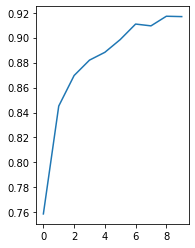

In [ ]:
# alall
if not os.path.isdir('rere'):
    os.makedirs('rere')
filepath = os.path.join('rere', model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpoint])

# Visualize the result
visualize_result(history, 'rere')


Train on 10379 samples
Epoch 1/10
10379/10379 [==============================] - 6s 555us/sample - loss: 0.4044 - acc: 0.9338
Epoch 2/10
10379/10379 [==============================] - 6s 550us/sample - loss: 0.4051 - acc: 0.9370
Epoch 3/10
10379/10379 [==============================] - 5s 513us/sample - loss: 0.4015 - acc: 0.9364
Epoch 4/10
10379/10379 [==============================] - 4s 393us/sample - loss: 0.4079 - acc: 0.9320
Epoch 5/10
10379/10379 [==============================] - 4s 403us/sample - loss: 0.3970 - acc: 0.9379
Epoch 6/10
10379/10379 [==============================] - 4s 393us/sample - loss: 0.3913 - acc: 0.9390
Epoch 7/10
10379/10379 [==============================] - 4s 392us/sample - loss: 0.3911 - acc: 0.9393
Epoch 8/10
10379/10379 [==============================] - 4s 396us/sample - loss: 0.3930 - acc: 0.9392
Epoch 9/10
10379/10379 [==============================] - 4s 396us/sample - loss: 0.3947 - acc: 0.9405
Epoch 10/10
10379/10379 [=========================

KeyError: ignored

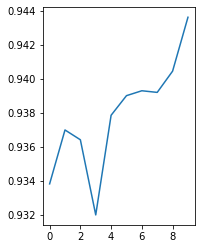

In [ ]:
# model_name = 'malnet_model.{epoch:03d}.h5'
if not os.path.isdir('save_dir'):
    os.makedirs('save_dir')
filepath = os.path.join('save_dir', model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpoint])

# Visualize the result
visualize_result(history, 'save_dir')

In [ ]:
import cv2

In [ ]:
def save_img(id, path):
  g = np.array(data[data['sha256'] == id].iloc[:,0:797])
  if len(g) > 0:
    while len(g)<=128*128:
      g = np.append(g,g)
    d = g[0:128*128].reshape((128,128))
    img = Image.fromarray(d,mode='L')
    Path("images_dir_gray_6460128/"+path).mkdir(parents=True, exist_ok=True)
    
    img.save("images_dir_gray_6460128/"+path+'/'+id+'.png')

In [ ]:
arr = os.listdir("test")

In [ ]:
arr = os.listdir("test")
b = []
for a in arr:
  lable = a
  datasetT=pd.read_csv("test/"+a,delimiter="\t",header=None)
  arr_list_ids = [x.strip(' ') for x in datasetT[0].tolist()]
  for idx, val in enumerate(arr_list_ids):
   if idx > len(arr_list_ids)-11:
     continue 
   print(idx, lable )
   save_img(val, lable)
  #  b.append(val)

In [ ]:
len(b)

32971

In [ ]:

gg = np.array(data[data['sha256'] == b].iloc[:,0:797])


ValueError: ignored

In [ ]:
arr

['Others',
 'Dropper',
 'Rootkit',
 'Undefined',
 'Adware',
 'Spyware',
 'Ransomware',
 'Agent',
 'newTrojan',
 'Virus',
 'Worms',
 'Backdoor',
 'Downloader',
 'Crypt']

In [ ]:
for a in arr:
  lable = a
  datasetT=pd.read_csv("test/"+a,delimiter="\t",header=None)
  arr_list_ids = [x.strip(' ') for x in datasetT[0].tolist()]
  for idx, val in enumerate(arr_list_ids):
    if idx > len(arr_list_ids)-11:
      continue 
    print(idx, lable )
    save_img(val, lable)

In [ ]:
from PIL import Image
import numpy as np

g = np.array(data[data['sha256'] == "9c5508ea9316d3625ac1cb5cc3c6929e1a803720481699fa764694e1c807121d"].iloc[:,0:797])

while len(g)<=16383:
  g = np.append(g,g)
d = g[0:16384].reshape((128,128))

img = Image.fromarray(d,mode='L')
img.save('my.png')
img.show()

In [ ]:
!zip -r /content/file128.zip /content/images_dir_gray_128/


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

class CnnUtils:

    def get_weight(self, shape):
        init=tf.truncated_normal(shape,stddev=0.1)
        return tf.Variable(init)

    def get_bias(self, shape):
        init=tf.constant(0.1,shape=shape)
        return tf.Variable(init)

    def conv2d(self, x, w):
        return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding="SAME")

    def maxpool_2d(self, x):
        return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

    def conv_layer(self, input, shape):
        b=self.get_bias([shape[3]])
        w=self.get_weight(shape)
        return tf.nn.relu(self.conv2d(input,w)+b)

    def full_layer(self, input, size):
        in_size=int(input.get_shape()[1])
        w=self.get_weight([in_size,size])
        b=self.get_bias([size])
        return tf.matmul(input,w)+b


utils=CnnUtils()
x=tf.placeholder(tf.float32,shape=[None,32,32,3])
y=tf.placeholder(tf.float32,shape=[None,10])
conv1=utils.conv_layer(x, shape=[5,5,3,32])

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
len(X_test)

2595

In [ ]:
len(y_test)

2595

In [ ]:
y_pred = model.predict(X_test)

y_pred2 = np.argmax(Y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred2, np.array(y_test.astype(np.int)))
print('Accuracy: %.4f' % accuracy)
# Precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Precision: %.4f' % precision)

# Recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Recall: %.4f' % recall)

# F1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('F1 score: %.4f' % f1)

In [ ]:
y_pred2

array([2, 2, 0, ..., 8, 0, 2])

In [ ]:
y_tetest1 =to_categorical(y_test, num_classes=11)

2595

In [ ]:
np.array(y_test.astype(np.int))

array([2, 2, 0, ..., 8, 0, 2])

In [ ]:

# Accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred2, np.array(y_test.astype(np.int)))
print('Accuracy: %.4f' % accuracy)


Accuracy: 0.8566


In [ ]:

# # Accuracy: (tp + tn) / (p + n)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(Y_test2, y_pred)
# print('Accuracy: %.4f' % accuracy)

# Precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Precision: %.4f' % precision)

# Recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('Recall: %.4f' % recall)

# F1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score( np.array(y_test.astype(np.int)), y_pred2, pos_label='positive', average='micro')
print('F1 score: %.4f' % f1)


Precision: 0.8566
Recall: 0.8566
F1 score: 0.8566



 Classification report:
              precision    recall  f1-score   support

           0     0.7836    0.8299    0.8061       288
           1     0.8982    0.9051    0.9017       390
           2     0.9701    0.9725    0.9713       400
           3     0.7912    0.8090    0.8000        89
           4     0.9167    0.7097    0.8000        31
           5     0.7000    0.3500    0.4667        20
           6     0.6000    0.5000    0.5455         6
           7     0.8355    0.7591    0.7955       602
           8     0.8616    0.9321    0.8955       501
           9     0.7726    0.7985    0.7853       268

    accuracy                         0.8566      2595
   macro avg     0.8129    0.7566    0.7767      2595
weighted avg     0.8563    0.8566    0.8551      2595



FileNotFoundError: ignored

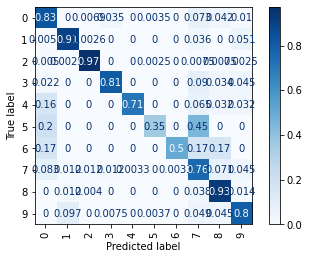

In [ ]:

#   tên nhãn
nhan =['Adware',
'Agent',
'Backdoor',
'Downloader',
'Dropper',
'Ransomware',
'Spyware',
'Trojan',
'Virus',
'Worms']

# Classification report for precision, recall, f1-score and accuracy (báo cáo phân loại)
from sklearn.metrics import classification_report
matrixXXX = classification_report(np.array(y_test.astype(np.int)), y_pred2, digits=4)
print('\n Classification report:')
print(matrixXXX)

# create Confusion matrix
from sklearn.metrics import confusion_matrix
Cmatrix = confusion_matrix(np.array(y_test.astype(np.int)), y_pred2, normalize='true')

# Tạo biểu đồ cho Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
cmd = ConfusionMatrixDisplay(Cmatrix, display_labels=nhan)
cmd = ConfusionMatrixDisplay(Cmatrix)
cmd.plot(cmap='Blues', xticks_rotation='vertical')
plt.savefig('./ketqua/model_CNN.png')



In [ ]:
import numpy as np
import pandas as pd
import os
import gc
import warnings;
warnings.filterwarnings('ignore')

root = "./images_dir_gray_6460128"
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=root, target_size=(64,64), batch_size=700)
print(batches.class_indices)

imgs, labels = next(batches)

print("imgs.shape: ", imgs.shape)
print("labels.shape: ", labels.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( imgs, labels , test_size=0.2) #    random_state=2

num_classes = 12;

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Conv2D, Flatten, MaxPool1D, MaxPooling2D
from keras import layers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, Activation
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
# from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score

X_train = np.expand_dims(X_train, axis=-1)
# X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


learning_rate = 1e-3


regularizer = regularizers.l2(5e-4)
dim = X_train.shape[1]
inputs=tf.placeholder(tf.float32,shape=[128, 3, 2]) #tf.Tensor(shape=(None, 1, 128), dtype=np.float32)
# Build the model
model = Sequential()
model.add(Conv1D(128, 64, strides=64, activation='relu',kernel_regularizer=regularizer, input_shape=(dim, 1)))
model.add(BatchNormalization())
# model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, kernel_regularizer=regularizer, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=regularizer, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, kernel_regularizer=regularizer, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
optimizer = 'adam',
              metrics=['accuracy'])
# # Create the model CNN
# model = Sequential()
# model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# model.summary()

model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)


# # save the model
# from tensorflow import keras
# model.save('./ketqua/model_CNN')

# # Test the model after training(Kiểm tra mô hình sau khi đào tạo)
# test_results = model.evaluate(X_test, Y_test, verbose=1)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# train_results = model.evaluate(X_train, Y_train , verbose=1)
# print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]}%')

# # predict crisp classes for test set(dự đoán các lớp nhãn cho bộ thử nghiệm)
# y_pred = model.predict(X_test)

# Y_test2 = np.argmax(Y_test, axis=1)

# # Accuracy: (tp + tn) / (p + n)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(Y_test2, y_pred)
# print('Accuracy: %.4f' % accuracy)

# # Precision tp / (tp + fp)
# from sklearn.metrics import precision_score
# precision = precision_score(Y_test2, y_pred, pos_label='positive', average='micro')
# print('Precision: %.4f' % precision)

# # Recall: tp / (tp + fn)
# from sklearn.metrics import recall_score
# recall = recall_score(Y_test2, y_pred, pos_label='positive', average='micro')
# print('Recall: %.4f' % recall)

# # F1: 2 tp / (2 tp + fp + fn)
# from sklearn.metrics import f1_score
# f1 = f1_score(Y_test2, y_pred, pos_label='positive', average='micro')
# print('F1 score: %.4f' % f1)

# #   tên nhãn
# #   nhan = ['Ramnit', 'Lollipop', 'Kelihos_ver3', 'Vundo', 'Simda', 'Tracur', 'Kelihos_ver1' , 'Obfuscator.ACY', 'Gatak']

# # Classification report for precision, recall, f1-score and accuracy (báo cáo phân loại)
# from sklearn.metrics import classification_report
# matrixXXX = classification_report(Y_test2, y_pred, digits=4)
# print('\n Classification report:')
# print(matrixXXX)

# # create Confusion matrix
# from sklearn.metrics import confusion_matrix
# #Cmatrix = confusion_matrix(Y_test2, y_pred, normalize='true')

# # Tạo biểu đồ cho Confusion matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from matplotlib import pyplot as plt
# #cmd = ConfusionMatrixDisplay(Cmatrix, display_labels=nhan)
# #cmd = ConfusionMatrixDisplay(Cmatrix)
# #cmd.plot(cmap='Blues', xticks_rotation='vertical')
# #plt.savefig('./ketqua/model_CNN.png')



# print("--------------- [The end] ------------------")




Found 13001 images belonging to 11 classes.
{'Adware': 0, 'Agent': 1, 'Backdoor': 2, 'Downloader': 3, 'Dropper': 4, 'Others': 5, 'Ransomware': 6, 'Spyware': 7, 'Virus': 8, 'Worms': 9, 'newTrojan': 10}
imgs.shape:  (700, 64, 64, 3)
labels.shape:  (700, 11)
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_41 (Conv1D)          (None, 1, 128)            8320      
                                                                 
 batch_normalization_36 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                             

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import os
import gc
import warnings;
warnings.filterwarnings('ignore')

root = "./cccc"
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=root, target_size=(64,64), batch_size=700)
print(batches.class_indices)

imgs, labels = next(batches)

print("imgs.shape: ", imgs.shape)
print("labels.shape: ", labels.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( imgs, labels , test_size=0.2) #    random_state=2

num_classes = 12;

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Conv2D, Flatten, MaxPool1D, MaxPooling2D
from keras import layers

# Create the model CNN
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

model.fit(X_train, Y_train, epochs=50, verbose=1, validation_split=0.1)


# save the model
from tensorflow import keras
model.save('./ketqua/model_CNN')

# Test the model after training(Kiểm tra mô hình sau khi đào tạo)
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

train_results = model.evaluate(X_train, Y_train , verbose=1)
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]}%')


Found 15840 images belonging to 12 classes.
{'Adware': 0, 'Agent': 1, 'Backdoor': 2, 'Downloader': 3, 'Dropper': 4, 'Others': 5, 'Ransomware': 6, 'Spyware': 7, 'Trojan': 8, 'Virus': 9, 'Worms': 10, 'newTrojan': 11}
imgs.shape:  (700, 64, 64, 3)
labels.shape:  (700, 12)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28830)             0         
                                                                 
 dense (Dense)               (None, 256)               7380736   
                                                  

In [ ]:
data= pd.read_csv("Data_Training.csv")
data

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,label,sha256,fold,className
0,0.348073,0.003285,0.003107,0.003113,0.003103,0.003759,0.003080,0.004080,0.002428,0.002403,0.002489,0.002424,0.002409,0.002706,0.002479,0.002516,0.002381,0.002383,0.002528,0.002293,0.002419,0.002379,0.002436,0.002282,0.002340,0.002358,0.002387,0.002164,0.002325,0.002585,0.002327,0.002241,0.002648,0.002268,0.002329,0.002307,0.002499,0.004591,0.002276,0.002391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24268.0,450560.0,18444.0,491520.0,0.0,0.0,0.0,0.0,13197.0,475136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,00cc8b8f1cbc94dd182b7f0ae9bbb6e497ecab2f194fe2...,18,Adware
1,0.057452,0.005465,0.004782,0.007416,0.005413,0.004179,0.004543,0.006293,0.005420,0.003434,0.003547,0.003500,0.004678,0.003781,0.003370,0.005387,0.004477,0.003119,0.002954,0.005742,0.003623,0.003443,0.003814,0.002781,0.003739,0.003564,0.003133,0.003190,0.003628,0.003067,0.003377,0.003233,0.005288,0.002937,0.002909,0.003131,0.003772,0.003207,0.003039,0.003197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,406440.0,488.0,442368.0,0.0,0.0,7640.0,415232.0,4760.0,446464.0,56.0,381328.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,403824.0,0.0,0.0,324.0,380928.0,0.0,0.0,0.0,0.0,1,0379d99929825e6ae55795353dbbbe462f9b85b7e11528...,52,Adware
2,0.036781,0.006217,0.003983,0.004060,0.004049,0.003727,0.003650,0.003758,0.004344,0.003544,0.003683,0.003720,0.003881,0.003531,0.003595,0.004300,0.003952,0.004346,0.003566,0.003473,0.003806,0.004284,0.003711,0.003595,0.003687,0.003667,0.003290,0.003528,0.003685,0.003489,0.003634,0.003432,0.004053,0.003370,0.003648,0.003681,0.003927,0.003714,0.003500,0.003412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,29604.0,31738.0,2789376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,652.0,28672.0,0.0,0.0,0.0,0.0,1,03cfdb9c839f2d82e23e669f0c4cabccb30dcfdc573188...,37,Adware
3,0.178206,0.009927,0.005873,0.004264,0.011446,0.005299,0.003804,0.003588,0.010587,0.001691,0.001666,0.001842,0.006790,0.002757,0.001304,0.012998,0.008939,0.002329,0.001254,0.001275,0.004175,0.002809,0.001416,0.000936,0.002891,0.001373,0.001095,0.001257,0.002290,0.000849,0.000858,0.002395,0.004113,0.000888,0.001350,0.001459,0.007321,0.001145,0.000781,0.000870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,416936.0,480.0,442368.0,0.0,0.0,0.0,0.0,15048.0,446464.0,28.0,392464.0,0.0,0.0,0.0,0.0,24.0,392588.0,64.0,392496.0,0.0,0.0,380.0,331776.0,0.0,0.0,0.0,0.0,1,04b1ad9f01eaffe12c6e421a7d238b90959202b39cc03c...,16,Adware
4,0.169617,0.003844,0.003602,0.004057,0.004012,0.003139,0.003800,0.003855,0.003402,0.003121,0.002976,0.002987,0.002855,0.002805,0.002835,0.003493,0.002908,0.002900,0.002733,0.002794,0.002791,0.002824,0.002757,0.002776,0.002967,0.002806,0.002740,0.006816,0.002752,0.002795,0.002896,0.002965,0.004469,0.003413,0.002852,0.002721,0.002768,0.003152,0.003366,0.003017,...,0.0,1.0,0.0,-2.0,-1.0,1.0,0.0,0.0,15594.0,7692288.0,16876.0,7741440.0,0.0,0.0,5056.0,3836568.0,244.0,7667712.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,7553400.0,0.0,0.0,0.0,0.0,676.0,6594560.0,0.0,0.0,0.0,0.0,1,05f4c2f8506d14eba67d48a73f836d43672bd9c8fe6a0f...,22,Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12969,0.195938,0.011750,0.033319,0.006908,0.011229,0.007702,0.005268,0.004840,0.007760,0.009454,0.004912,0.003020,0.004633,0.004164,0.004099,0.002949,0.003067,0.001435,0.001529,0.002418,0.002749,0.002161,0.001349,0.001326,0.001380,0.001224,0.002207,0.002257,0.002077,0.001512,0.002920,0.001591,0.001998,0.001924,0.001874,0.001

In [ ]:
class_ids, class_names = list(zip(*set(zip(data.className, data.className))))
classes = list(np.array(class_names)[np.argsort(class_ids)])
classes = list(map(lambda x: str(x), classes))
classes

['Adware',
 'Agent',
 'Backdoor',
 'Downloader',
 'Dropper',
 'Ransomware',
 'Spyware',
 'Trojan',
 'Virus',
 'Worms']

In [ ]:

features = ['x_min', 'y_min', 'x_max', 'y_max', 'x_mid', 'y_mid', 'w', 'h', 'area']
X = data.iloc[:,0:797]
y = data['className']
X.shape, y.shape

((12974, 797), (12974,))

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 40, random_state=1, n_iter=5000)
data_X = X
data_y = y.loc[data_X.index]
embs = tsne.fit_transform(data_X)
# Add to dataframe for convenience
plot_x = embs[:, 0]
plot_y = embs[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 16min 31s, sys: 4.35 s, total: 16min 36s
Wall time: 9min 11s


In [ ]:
plot_y

array([-81.10059  , -38.878605 , -11.630419 , ..., -21.722054 ,
        30.921686 ,   5.6150956], dtype=float32)

In [ ]:
data_y.tolist()

In [ ]:
data_y = y.loc[data_X.index]

0s
class_ids, class_names = list(zip(*set(zip(data.className, data.className))))
classes = list(np.array(class_names)[np.argsort(class_ids)])
classes = list(map(lambda x: str(x), classes))
classes
['Adware',
 'Agent',
 'Backdoor',
 'Downloader',
 'Dropper',
 'Ransomware',
 'Spyware',
 'Trojan',
 'Virus',
 'Worms']

In [ ]:
l = []
for a in data_y: 
  if a == 'Adware':
    l.append(1)
  elif a == 'Agent':
    l.append(2)
  elif a == 'Backdoor':
    l.append(3)
  elif a == 'Downloader':
    l.append(4)
  elif a == 'Dropper':
    l.append(5)
  elif a == 'Ransomware':
    l.append(6)
  elif a == 'Spyware':
    l.append(7)
  elif a == 'Trojan':
    l.append(8)
  elif a == 'Virus':
    l.append(9)
  elif a == 'Worms':
    l.append(10)

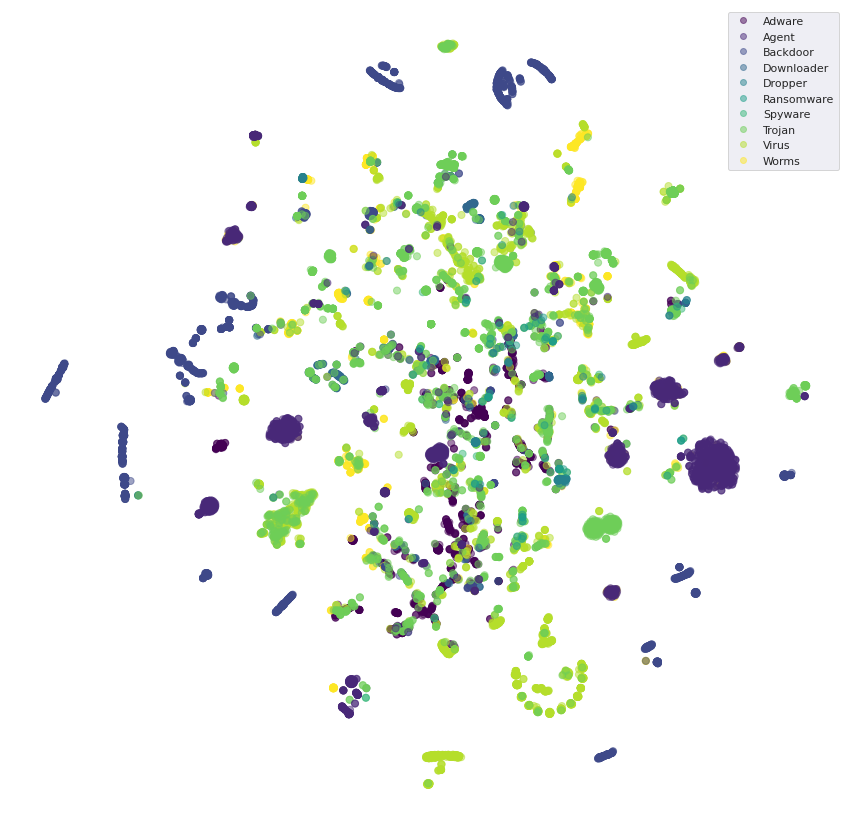

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
plt.axis('off')
scatter = plt.scatter(plot_x, plot_y, marker = 'o',s = 50, c=l, alpha= 0.5,cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [ ]:

features = ['x_min', 'y_min', 'x_max', 'y_max', 'x_mid', 'y_mid', 'w', 'h', 'area']
X = data.iloc[:,0:256]
y = data['className']
X.shape, y.shape

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 40, random_state=1, n_iter=5000)
data_X = X
data_y = y.loc[data_X.index]
embs = tsne.fit_transform(data_X)
# Add to dataframe for convenience
plot_x = embs[:, 0]
plot_y = embs[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 18min 20s, sys: 3.95 s, total: 18min 24s
Wall time: 10min 4s


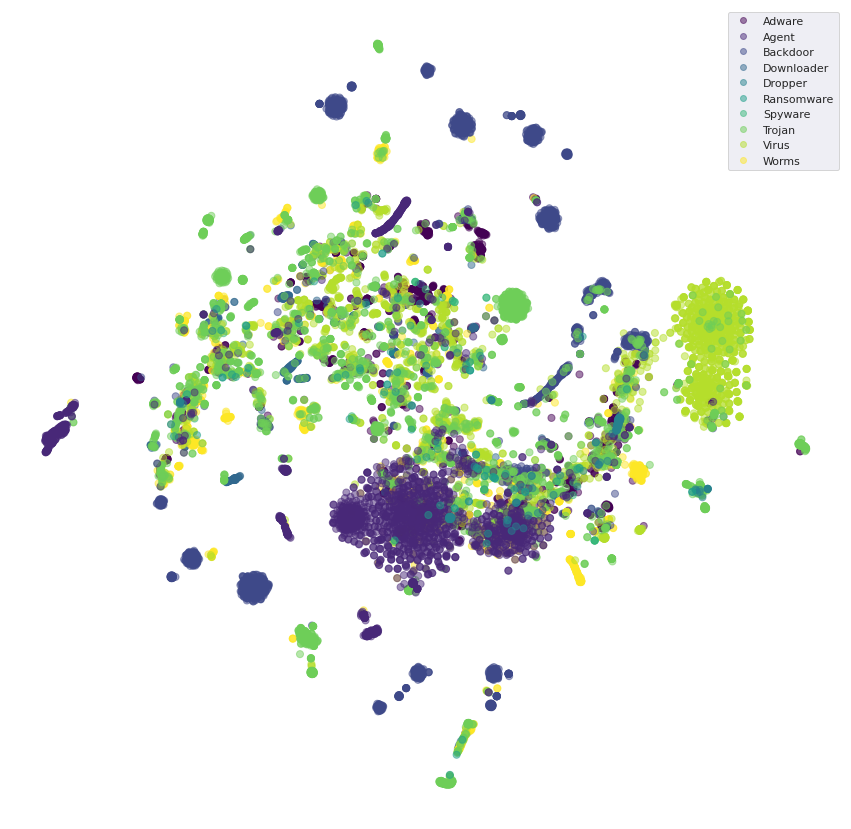

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
plt.axis('off')
scatter = plt.scatter(plot_x, plot_y, marker = 'o',s = 50, c=l, alpha= 0.5,cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 19min 9s, sys: 4.17 s, total: 19min 13s
Wall time: 10min 52s


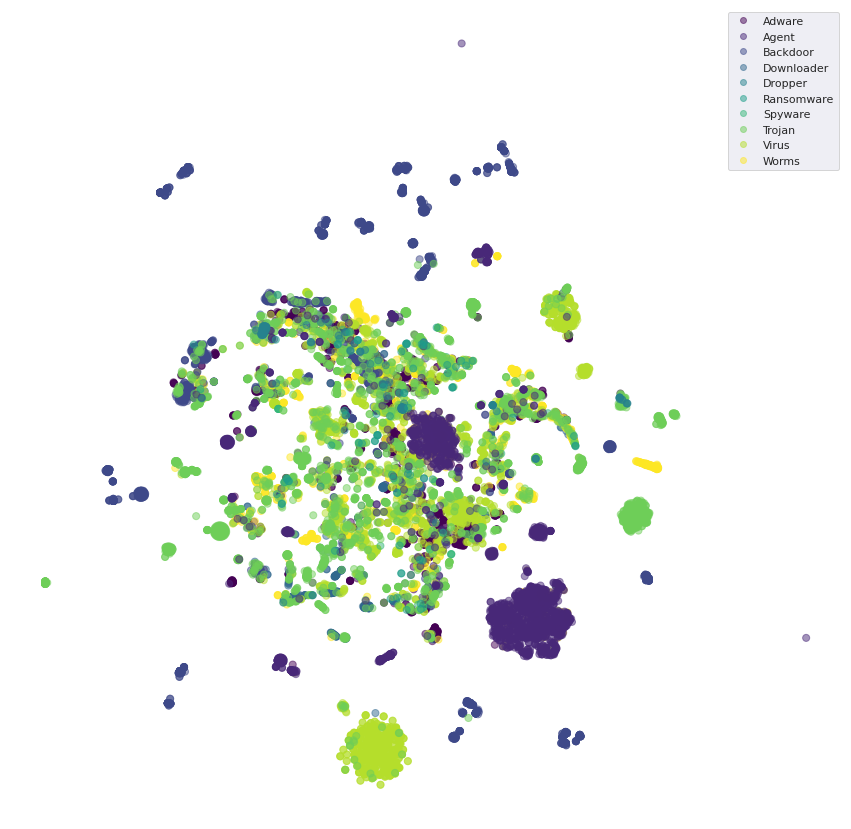

In [ ]:

%%time
X = data.iloc[:,256:512]
y = data['className']
X.shape, y.shape

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 40, random_state=1, n_iter=5000)
data_X = X
data_y = y.loc[data_X.index]
embs = tsne.fit_transform(data_X)
# Add to dataframe for convenience
plot_x = embs[:, 0]
plot_y = embs[:, 1]

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
plt.axis('off')
scatter = plt.scatter(plot_x, plot_y, marker = 'o',s = 50, c=l, alpha= 0.5,cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 15min 51s, sys: 4.23 s, total: 15min 56s
Wall time: 8min 51s


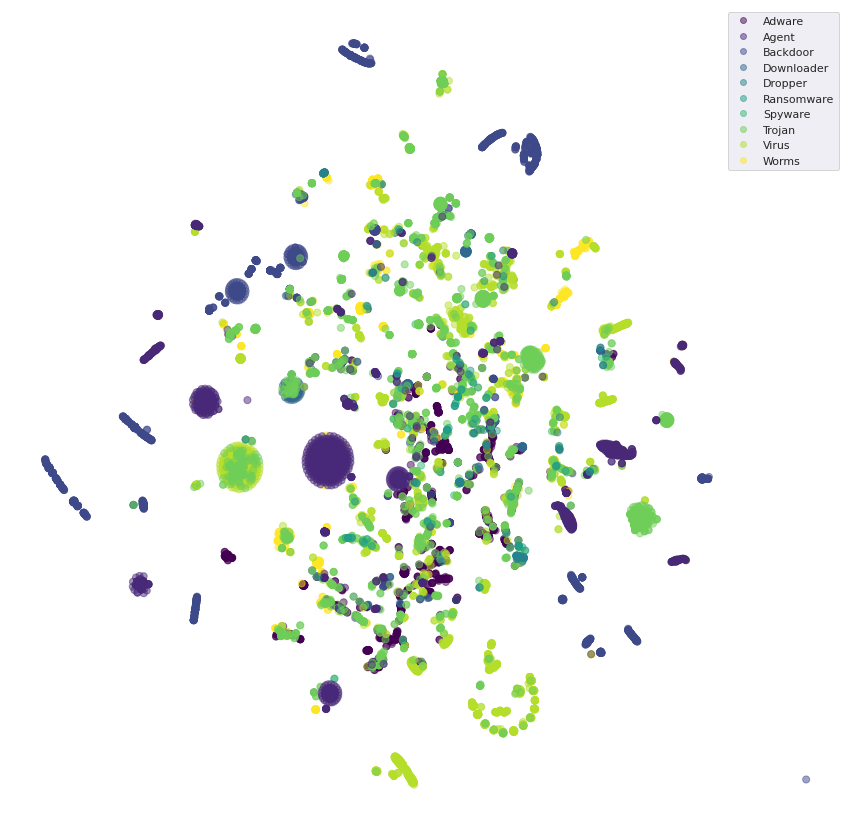

In [ ]:

%%time
X = data.iloc[:,512:797]
y = data['className']
X.shape, y.shape

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 40, random_state=1, n_iter=5000)
data_X = X
data_y = y.loc[data_X.index]
embs = tsne.fit_transform(data_X)
# Add to dataframe for convenience
plot_x = embs[:, 0]
plot_y = embs[:, 1]

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
plt.axis('off')
scatter = plt.scatter(plot_x, plot_y, marker = 'o',s = 50, c=l, alpha= 0.5,cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [ ]:
import cv2

In [ ]:
arr = os.listdir("/content/images_dir_gray_6460128")
b = []
for a in arr:
  lable = a
  datasetT=pd.read_csv("test/"+a,delimiter="\t",header=None)
  # arr_list_ids = [x.strip(' ') for x in datasetT[0].tolist()]
  
  arr_list_ids = os.listdir("/content/images_dir_gray_6460128/"+lable)
  for idx, val in enumerate(arr_list_ids):
   if idx > len(arr_list_ids)-11:
     continue 
   print(idx, lable, val )
   img = cv2.imread("/content/images_dir_gray_6460128/"+lable+"/"+val, cv2.IMREAD_UNCHANGED)
   scale_percent = 300 # percent of original size
   width = int(img.shape[1] * scale_percent / 100)
   height = int(img.shape[0] * scale_percent / 100)
   dim = (width, height)
      
    # resize image
   resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

   Path("/content/ddddddd/"+lable).mkdir(parents=True, exist_ok=True)


   cv2.imwrite("/content/ddddddd/"+lable+"/"+val, img)



   # save_img(val, lable)
  #  b.append(val)

Streaming output truncated to the last 5000 lines.
1183 Backdoor b547d8cc7dfbfbc8264ccbca6f7ccfe5ce122a5f68b32d008fa1526a12161582.png
1184 Backdoor 9581888b8ea978ae5fbe484b489c6e9450e5868f03f76f4ea5159a73dbb5cfd3.png
1185 Backdoor cdb1c4a66dc6d9e54f7442f1455a6cb7bf8bfc1b15c7d3be9dbc90c8b6788f44.png
1186 Backdoor 328e3af58c7a2bff4bedccdcac092fe13d2870e0a8268c9ec263974a21e8ef11.png
1187 Backdoor b4cb0eef4439f33878973650bc8e550bca48f29e7d117a2b0da4542201c46944.png
1188 Backdoor 77b26cdd01bbcbfa548df9088ac983155a9c8856ed446e9f926c3bb650357ed5.png
1189 Backdoor 97bb0bfb25d8d68a8719cf7e9404caaecc3e6c64a9102c171c4b9dc2fd4879dd.png
1190 Backdoor 31b41ad04a4f713877e98fc08243152469f6f4c99ddffbbac0943621e3aaf2bc.png
1191 Backdoor e7ee4645477fc578e2177718906a2e5f079c8f7e6076836844a582fd0d0f60f4.png
1192 Backdoor ba813024cae467c0d833b026baa03424f0363ec584083ac0bd48452be1772f72.png
1193 Backdoor 77bc625c3f3b02baecc08f0cd4d8e5f59fa8ce263241f2e8eb8e427bc5ae4086.png
1194 Backdoor fdd3b2279ebdf088b8e3e7

In [ ]:
!pip install tensorboardX

     |████████████████████████████████| 124 kB 10.2 MB/s 


In [ ]:
import pandas as pd
import torch
import numpy as np
import pickle
import sys
import os
import gc

# sys.path.append('../libs')
# import ember

from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from torch import nn
import joblib


from tensorboardX import SummaryWriter
from sklearn.metrics import classification_report, f1_score
from torch.utils.data import Dataset, DataLoader

batch_size=256
gpu_id=0
train_epochs=30
learning_rate=0.01

In [ ]:
class ConvDoc(nn.Module):
    def __init__(self):
        super(ConvDoc,self).__init__()
        input_dim=2351
        self.conv1=nn.Conv1d(1,8,3,stride=2)
        self.conv2=nn.Conv1d(8,16,3,stride=4)
        self.conv3=nn.Conv1d(16,4,15,stride=5,dilation=10)
        self.dropout=nn.Dropout(0.2)
        
        self.clf=nn.Linear(124,2)
    def forward(self,inputs):
        batch_size=inputs.shape[0]
        inputs=inputs.unsqueeze(1)
        conv1=self.dropout(torch.relu(self.conv1(inputs)))
        conv2=self.dropout(torch.relu(self.conv2(conv1)))
        conv3=torch.relu(self.conv3(conv2))
        latent=conv3.view([batch_size,-1])
        return nn.functional.log_softmax(self.clf(latent),dim=-1)
model=ConvDoc()
# if gpu_id>=0:
#     model=model.cuda(gpu_id)
criterion=nn.NLLLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
import numpy as np
import pandas as pd
import os
import gc
import warnings;
warnings.filterwarnings('ignore')

root = "./cccc"
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=root, target_size=(64,64), batch_size=700)
print(batches.class_indices)

imgs, labels = next(batches)

print("imgs.shape: ", imgs.shape)
print("labels.shape: ", labels.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( imgs, labels , test_size=0.2) #    random_state=2


Found 15840 images belonging to 12 classes.
{'Adware': 0, 'Agent': 1, 'Backdoor': 2, 'Downloader': 3, 'Dropper': 4, 'Others': 5, 'Ransomware': 6, 'Spyware': 7, 'Trojan': 8, 'Virus': 9, 'Worms': 10, 'newTrojan': 11}
imgs.shape:  (700, 64, 64, 3)
labels.shape:  (700, 12)


In [ ]:
summary_writer= SummaryWriter(log_dir='../logs')
global_step=0
for epoch in tqdm_notebook(range(train_epochs),desc='Epochs'):  # loop over the dataset multiple times
    
    running_loss = 0.0
    print('-'*50)
    print('Epoch %d'%epoch)
    for i, data in enumerate(tqdm_notebook(X_train), 0):
        
        # get the inputs
        inputs, labels = data
        # if(gpu_id>=0):
        #     inputs=inputs.cuda(gpu_id)
        #     labels=labels.cuda(gpu_id)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        summary_writer.add_scalar('ConvDoc/Batch loss',loss,global_step)
        global_step=global_step+1
        
    # Test evaluation
    targets=[]
    preds=[]
    model=model.eval()
    for i, data in enumerate(X_test,0):
        inputs, labels = data
        if(gpu_id>=0):
            inputs=inputs.cuda(gpu_id)
            labels=labels.cuda(gpu_id)
        outputs=model(inputs)
        outputs=list(outputs.argmax(-1).cpu().detach().numpy())
        labels=list(labels.cpu().numpy())
        targets.extend(labels)
        preds.extend(outputs)
    model=model.train()
    print('Test data score:')
    print(classification_report(targets,preds))
    summary_writer.add_scalar('ConvDoc/F1 score',f1_score(targets,preds),global_step)
        #print('[%d, %5d] loss: %.3f' %
        #      (epoch + 1, i + 1, loss))
print('Finished Training')

Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

--------------------------------------------------
Epoch 0


  0%|          | 0/560 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import os
import gc
import warnings;
warnings.filterwarnings('ignore')

root = "./cccc"
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=root, target_size=(64,64), batch_size=700)
print(batches.class_indices)

imgs, labels = next(batches)

print("imgs.shape: ", imgs.shape)
print("labels.shape: ", labels.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( imgs, labels , test_size=0.2) #    random_state=2

num_classes = 12;

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Conv2D, Flatten, MaxPool1D, MaxPooling2D
from keras import layers

# Create the model CNN
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# model.summary()

# ?model.fit(X_train, Y_train, epochs=50, verbose=1, validation_split=0.1)

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.summary()
model.fit(X_train, Y_train, epochs=50, verbose=1, validation_split=0.1)
# save the model
from tensorflow import keras
model.save('./ketqua/model_CNN')

# Test the model after training(Kiểm tra mô hình sau khi đào tạo)
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

train_results = model.evaluate(X_train, Y_train , verbose=1)
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]}%')


16/16 [==============================] - 8s 526ms/step - loss: 0.2537 - accuracy: 0.9107 - val_loss: 2.7911 - val_accuracy: 0.5179
Epoch 24/50
16/16 [==============================] - 8s 528ms/step - loss: 0.2225 - accuracy: 0.9286 - val_loss: 2.3724 - val_accuracy: 0.4821
Epoch 25/50
16/16 [==============================] - 13s 798ms/step - loss: 0.2049 - accuracy: 0.9405 - val_loss: 2.5317 - val_accuracy: 0.5357
Epoch 26/50
16/16 [==============================] - 8s 529ms/step - loss: 0.1993 - accuracy: 0.9266 - val_loss: 2.3919 - val_accuracy: 0.4821
Epoch 27/50
16/16 [==============================] - 9s 536ms/step - loss: 0.1468 - accuracy: 0.9603 - val_loss: 2.4124 - val_accuracy: 0.5357
Epoch 28/50
16/16 [==============================] - 8s 528ms/step - loss: 0.1717 - accuracy: 0.9425 - val_loss: 2.4919 - val_accuracy: 0.4643
Epoch 29/50
16/16 [==============================] - 8s 531ms/step - loss: 0.1659 - accuracy: 0.9504 - val_loss: 2.7860 - val_accuracy: 0.4464
Epoch 30/5

In [ ]:
import numpy as np
import pandas as pd
import os
import gc
import warnings;
warnings.filterwarnings('ignore')

root = "./cccc"
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=root, target_size=(128,128), batch_size=500)
print(batches.class_indices)


print("imgs.shape: ", imgs.shape)
print("labels.shape: ", labels.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( imgs, labels , test_size=0.3, random_state=100) #    random_state=2

num_classes = 12;

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Conv2D, Flatten, MaxPool1D, MaxPooling2D
from keras import layers

# Create the model CNN
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, input_shape=(64,64,3), activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# model.summary()

# ?model.fit(X_train, Y_train, epochs=50, verbose=1, validation_split=0.1)

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.summary()
model.fit(X_train, Y_train, epochs=50, verbose=1, validation_split=0.1)
# save the model
from tensorflow import keras
model.save('./ketqua/model_CNN')

# Test the model after training(Kiểm tra mô hình sau khi đào tạo)
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

train_results = model.evaluate(X_train, Y_train , verbose=1)
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]}%')


Found 15840 images belonging to 12 classes.
{'Adware': 0, 'Agent': 1, 'Backdoor': 2, 'Downloader': 3, 'Dropper': 4, 'Others': 5, 'Ransomware': 6, 'Spyware': 7, 'Trojan': 8, 'Virus': 9, 'Worms': 10, 'newTrojan': 11}
imgs.shape:  (700, 64, 64, 3)
labels.shape:  (700, 12)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 31, 31, 30)       0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 28830)             0         
                                                                 
 dense_69 (Dense)            (None, 256)               7380736   
                                               

In [ ]:
 
#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(150, 120))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = cv2.imread('/content/vil/all.png')
Image2 = cv2.imread('/content/vil/entropy.png')
Image3 = cv2.imread('/content/vil/histogram.png')
Image4 = cv2.imread('/content/vil/section.png')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
# plt.axis('off')
plt.subplots_adjust(hspace =0.002 ,wspace = 0.002)
plt.title("all" ,fontsize=100)
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
# plt.axis('off')
plt.subplots_adjust(hspace =0.002 ,wspace = 0.002)

plt.title("entropy",fontsize=100)
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
plt.subplots_adjust(hspace =0.002 ,wspace = 0.002)
# showing image
plt.imshow(Image3)
# plt.axis('off')
plt.title("histogram",fontsize=100)
  
plt.subplots_adjust(hspace =0.002 ,wspace = 0.002)
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
# plt.axis('off')
plt.title("section",fontsize=100)

Text(0.5, 1.0, 'section')